In [1]:
from pydicom import dcmread
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import six
import statistics as stat

In [2]:
path = 'MR_Phantom_scans/DICOM_RT_CT_fusion_September/'
filename = 'RTSS.dcm'
image = 'IMG0000000100.dcm'
ds = dcmread(path + filename)
image = dcmread(path + image)

In [3]:
my_dict = {}
col_name = ['ROI Number', 'ROI Name']
df = pd.DataFrame(columns=col_name)
ROINumbers = []
ROINames = []
ROIDisplayColors = []
ContourDatas = []


In [4]:
for i in ds.StructureSetROISequence:
    ROINumbers.append(i.ROINumber)
    ROINames.append(i.ROIName)


for i in ds.ROIContourSequence:
    ROIDisplayColors.append(i.ROIDisplayColor)
    ContourSequences = []
    if "ContourSequence" in i:  
        for k in i.ContourSequence:
            ContourSequences.append(k.ContourData)
    ContourDatas.append(ContourSequences)


my_dict['ROI Numbers'] = ROINumbers
my_dict['ROI Names'] = ROINames
my_dict['ROI Display Colors'] = ROIDisplayColors
my_dict['Contour Data'] = ContourDatas
print(len(my_dict['Contour Data']))
df = df.from_dict(my_dict)

265


In [5]:
df

,ROI Numbers,ROI Names,ROI Display Colors,Contour Data
0,1,1_T2,"[255, 99, 71]","[[-65.9077369, -11.7199699, -1.5, -65.8755126,..."
1,2,1_T1,"[255, 0, 255]","[[-65.5175571, -11.2304896, 26, -65.5316592, -..."
2,3,2_CT,"[0, 191, 255]","[[-51.7753236, -11.4918437, 32.25, -51.708657,..."
3,4,2_T2,"[255, 165, 0]","[[-49.7244653, -11.7624206, -2.75, -49.7624518..."
4,5,2_T1,"[255, 0, 255]","[[-49.3292672, -11.087785, 24.75, -49.3853876,..."
...,...,...,...,...
260,261,87_T2,"[255, 165, 0]","[[45.9573496, -27.3330685, -4, 45.9244837, -27..."
261,262,88_CT,"[64, 224, 208]","[[60.271693, -27.4701839, 31, 60.3383597, -27...."
262,263,88_T1,"[255, 0, 255]","[[61.8011095, -26.4825832, 26, 61.7762988, -26..."
263,264,88_T2,"[255, 165, 0]","[[61.9135253, -27.3653304, -4, 61.8939163, -27..."


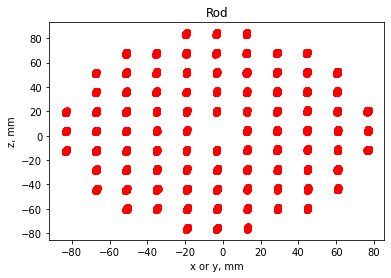

In [6]:
for i in range(0, len(df['Contour Data'])):
    for contour in df['Contour Data'][i]:
        z = contour[2]
        x = contour[0::3]
        y = contour[1::3]
    #     plt.scatter(stat.mean(x), z, color='red')
    #     plt.scatter(stat.mean(y), z, color='blue')
        plt.scatter(stat.mean(x), stat.mean(y), color='red')
plt.ylabel('z, mm')
plt.xlabel('x or y, mm')
plt.title('Rod')
plt.show()